In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

from collections import Counter

import itertools

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble._forest import ForestClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the csv file

dataframe1 = pd.read_csv("demand_data.csv")
dataframe2 = pd.read_csv("supply_data.csv")


In [3]:
dataframe = pd.merge(dataframe2, dataframe1, right_index=True, left_index=True)
print (dataframe)

    Unnamed: 0      Period  Permit_Number  construction  Homes_Sold  \
0            1  01-01-2000           1727        353065         873   
1            2  01-02-2000           1692        351933         856   
2            3  01-03-2000           1651        353452         900   
3            4  01-04-2000           1597        356188         841   
4            5  01-05-2000           1543        349907         857   
..         ...         ...            ...           ...         ...   
79          80  01-08-2006           1722        584460        1035   
80          81  01-09-2006           1655        573878        1016   
81          82  01-10-2006           1570        561444         941   
82          83  01-11-2006           1535        548971        1003   
83          84  01-12-2006           1638        545011         998   

    Housing_Starts        DATE  UNEM_RATE  MORTGAGE      GDPC1  FORECLOSURES  \
0             1636  01-01-2000       4.03      8.26  12935.252     

In [4]:
dataframe.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,1,01-01-2000,1727,353065,873,1636,01-01-2000,4.03,8.26,12935.252,1.95,101.34
1,2,01-02-2000,1692,351933,856,1737,01-04-2000,3.93,8.32,13170.749,1.97,103.67
2,3,01-03-2000,1651,353452,900,1604,01-07-2000,4.00,8.02,13183.890,2.09,105.79
3,4,01-04-2000,1597,356188,841,1626,01-10-2000,3.90,7.62,13262.250,2.23,108.27
4,5,01-05-2000,1543,349907,857,1575,01-01-2001,4.23,7.01,13219.251,2.34,110.48


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      84 non-null     int64  
 1   Period          84 non-null     object 
 2   Permit_Number   84 non-null     int64  
 3   construction    84 non-null     int64  
 4   Homes_Sold      84 non-null     int64  
 5   Housing_Starts  84 non-null     int64  
 6   DATE            84 non-null     object 
 7   UNEM_RATE       84 non-null     float64
 8   MORTGAGE        84 non-null     float64
 9   GDPC1           84 non-null     float64
 10  FORECLOSURES    84 non-null     float64
 11  HPI             84 non-null     float64
dtypes: float64(5), int64(5), object(2)
memory usage: 8.5+ KB


In [6]:
dataframe.describe()

,Unnamed: 0,Permit_Number,construction,Homes_Sold,Housing_Starts,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,42.500000,1847.750000,473967.202381,1054.773810,1796.119048,5.986667,5.092381,15968.048810,4.745119,161.669405
std,24.392622,218.735571,110392.854332,149.515712,205.931115,1.976243,1.324841,1762.701831,3.290622,30.778158
min,1.000000,1535.000000,337374.000000,793.000000,1463.000000,3.600000,2.760000,12935.252000,1.410000,101.340000
25%,21.750000,1658.250000,370467.750000,935.250000,1625.750000,4.552500,3.942500,14821.741750,2.097500,140.495000
50%,42.500000,1803.000000,439923.000000,1020.000000,1758.500000,5.430000,4.885000,15768.528500,3.160000,162.240000
75%,63.250000,2063.000000,568182.500000,1179.250000,1984.250000,7.005000,6.135000,17394.926250,7.517500,182.945000
max,84.000000,2263.000000,678562.000000,1389.000000,2273.000000,13.070000,8.320000,19202.310000,11.540000,232.550000


In [7]:
dataframe.isnull().values.any()

False

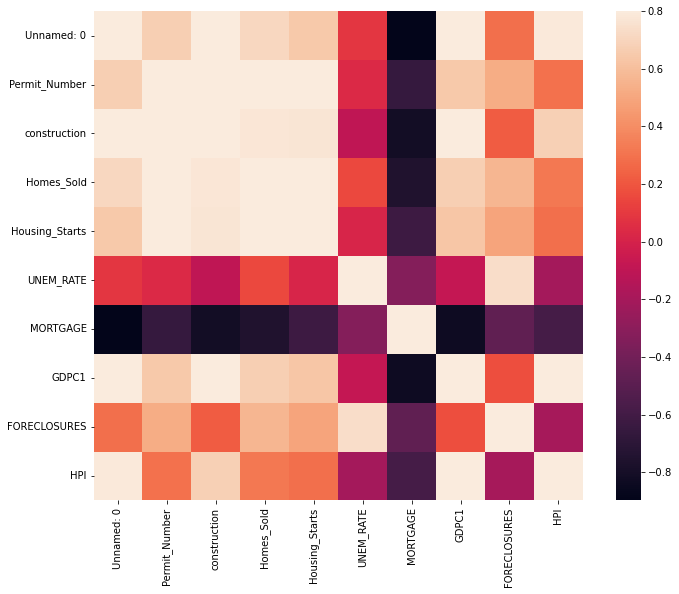

In [8]:
# Correlation matrix
import seaborn as sns
corrmat = dataframe.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [9]:
''' Detection '''
# IQR
Q1 = np.percentile(dataframe['UNEM_RATE'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(dataframe['UNEM_RATE'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dataframe.shape)

# Upper bound
upper = np.where(dataframe['UNEM_RATE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dataframe['UNEM_RATE'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
dataframe.drop(upper[0], inplace = True)
dataframe.drop(lower[0], inplace = True)

print("New Shape: ", dataframe.shape)


Old Shape:  (84, 12)
New Shape:  (83, 12)


In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#dataframe["NormalizedGDPC1", "NormalizedHousing_Starts", "NormalizedHomes_Sold", "Normalizedconstruction"] = scaler.fit_transform(dataframe["GDPC1","Housing_Starts", "Homes_Sold", "construction" ].values.reshape(-1, 1))
dataframe["NormalizedGDPC1"] = scaler.fit_transform(dataframe["GDPC1"].values.reshape(-1, 1))
dataframe["NormalizedHousing_Starts"] = scaler.fit_transform(dataframe["Housing_Starts"].values.reshape(-1, 1))
dataframe["NormalizedHomes_Sold"] = scaler.fit_transform(dataframe["Homes_Sold"].values.reshape(-1, 1))
dataframe["Normalizedconstruction"] = scaler.fit_transform(dataframe["construction"].values.reshape(-1, 1))

In [11]:
x1 = dataframe.drop((["DATE","Period", "Permit_Number", "GDPC1", "Housing_Starts", "Homes_Sold", "construction"]), axis=1, inplace=True)
#dataframe2 = dataframe.drop([['Period', 'Permit_Number', 'GDPC1', 'Housing_Starts', 'Homes_Sold', 'construction']]),axis=1, inplace=True)
#dataframe.drop(["Period", "Permit_Number"], inplace= True, axis=0)
# Y = dataframe["HPI"] 
# Xx = dataframe.drop(["HPI"], axis= 1)

In [12]:
print(x1)

None


In [13]:
Y = dataframe["HPI"] 
Xx = dataframe.drop(["HPI"], axis= 1)

In [14]:
Xx

,Unnamed: 0,UNEM_RATE,MORTGAGE,FORECLOSURES,NormalizedGDPC1,NormalizedHousing_Starts,NormalizedHomes_Sold,Normalizedconstruction
0,1,4.03,8.26,1.95,-1.717339,-0.806252,-1.229266,-1.089833
1,2,3.93,8.32,1.97,-1.583300,-0.309098,-1.343370,-1.100126
2,3,4.00,8.02,2.09,-1.575820,-0.963767,-1.048042,-1.086313
3,4,3.90,7.62,2.23,-1.531220,-0.855476,-1.444050,-1.061434
4,5,4.23,7.01,2.34,-1.555694,-1.106514,-1.336658,-1.118550
...,...,...,...,...,...,...,...,...
78,79,3.60,3.66,2.42,1.798671,-0.309098,-0.611762,1.141897
79,80,3.60,3.70,2.34,1.849701,-0.737340,-0.141922,1.014343
80,81,3.80,3.52,2.36,1.707227,-0.392777,-0.269450,0.918116
82,83,8.80,2.95,2.80,1.484556,-1.131125,-0.356706,0.691626


In [15]:
Xx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 83
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                83 non-null     int64  
 1   UNEM_RATE                 83 non-null     float64
 2   MORTGAGE                  83 non-null     float64
 3   FORECLOSURES              83 non-null     float64
 4   NormalizedGDPC1           83 non-null     float64
 5   NormalizedHousing_Starts  83 non-null     float64
 6   NormalizedHomes_Sold      83 non-null     float64
 7   Normalizedconstruction    83 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 5.8 KB


In [16]:
Y

0     101.34
1     103.67
2     105.79
3     108.27
4     110.48
       ...  
78    210.33
79    212.47
80    215.51
82    222.84
83    232.55
Name: HPI, Length: 83, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(Xx, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (58, 8)
Shape of test_X:  (25, 8)


In [18]:

# from sklearn.ensemble import RandomForestRegressore
# from sklearn.tree import DecisionTreeRegressore

#Decision Tree
decision_tree = DecisionTreeRegressor()

# Random Forest
random_forest = RandomForestRegressor(n_estimators= 100)

In [19]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100


In [20]:
mse = mean_squared_error(test_Y,predictions_dt)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)


mae = mean_absolute_error(test_Y,predictions_dt)
print("MAE :", mae)


r_value = r2_score(test_Y,predictions_dt)
print("R_squared value :", r_value)


MSE : 53.41952400000003
RMSE : 7.308866122730668
MAE : 5.038
R_squared value : 0.9300949146258937


In [21]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100


In [22]:
mse = mean_squared_error(test_Y,predictions_rf)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)


mae = mean_absolute_error(test_Y,predictions_rf)
print("MAE :", mae)


r_value = r2_score(test_Y,predictions_rf)
print("R_squared value :", r_value)


MSE : 10.57471542160033
RMSE : 3.251878752598308
MAE : 2.4759200000000448
R_squared value : 0.9861618687513231


In [23]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  98.6161868751323
Decision Tree Score:  93.00949146258937


In [24]:
import pandas as pd

df1 = pd.merge(Xx, Y, right_index=True, left_index=True)
print (df1)

    Unnamed: 0  UNEM_RATE  MORTGAGE  FORECLOSURES  NormalizedGDPC1  \
0            1       4.03      8.26          1.95        -1.717339   
1            2       3.93      8.32          1.97        -1.583300   
2            3       4.00      8.02          2.09        -1.575820   
3            4       3.90      7.62          2.23        -1.531220   
4            5       4.23      7.01          2.34        -1.555694   
..         ...        ...       ...           ...              ...   
78          79       3.60      3.66          2.42         1.798671   
79          80       3.60      3.70          2.34         1.849701   
80          81       3.80      3.52          2.36         1.707227   
82          83       8.80      2.95          2.80         1.484556   
83          84       6.77      2.76          2.74         1.602377   

    NormalizedHousing_Starts  NormalizedHomes_Sold  Normalizedconstruction  \
0                  -0.806252             -1.229266               -1.089833   
1  

In [25]:
df1.columns

Index(['Unnamed: 0', 'UNEM_RATE', 'MORTGAGE', 'FORECLOSURES',
       'NormalizedGDPC1', 'NormalizedHousing_Starts', 'NormalizedHomes_Sold',
       'Normalizedconstruction', 'HPI'],
      dtype='object')

In [26]:
##Move last Column to First Column

new_cols = ['HPI', 'Unnamed: 0', 'UNEM_RATE', 'MORTGAGE', 'FORECLOSURES',
       'NormalizedGDPC1', 'NormalizedHousing_Starts', 'NormalizedHomes_Sold',
       'Normalizedconstruction']
df3=df1[new_cols]
#or
#df3=df.reindex(columns=new_cols)
print(df3)

       HPI  Unnamed: 0  UNEM_RATE  MORTGAGE  FORECLOSURES  NormalizedGDPC1  \
0   101.34           1       4.03      8.26          1.95        -1.717339   
1   103.67           2       3.93      8.32          1.97        -1.583300   
2   105.79           3       4.00      8.02          2.09        -1.575820   
3   108.27           4       3.90      7.62          2.23        -1.531220   
4   110.48           5       4.23      7.01          2.34        -1.555694   
..     ...         ...        ...       ...           ...              ...   
78  210.33          79       3.60      3.66          2.42         1.798671   
79  212.47          80       3.60      3.70          2.34         1.849701   
80  215.51          81       3.80      3.52          2.36         1.707227   
82  222.84          83       8.80      2.95          2.80         1.484556   
83  232.55          84       6.77      2.76          2.74         1.602377   

    NormalizedHousing_Starts  NormalizedHomes_Sold  Normalizedc

In [27]:
# Return the feature importances (the higher, the more important the feature).
import pandas as pd

importances = pd.DataFrame({'feature':df3.iloc[:, 1:df3.shape[1]].columns,'importance':np.round(random_forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Unnamed: 0,0.375
NormalizedGDPC1,0.344
UNEM_RATE,0.130
Normalizedconstruction,0.089
MORTGAGE,0.021
FORECLOSURES,0.021
NormalizedHomes_Sold,0.013
NormalizedHousing_Starts,0.006


<AxesSubplot:xlabel='feature'>

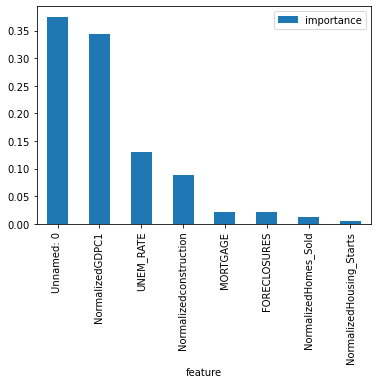

In [28]:
#Visualize the importance
importances.plot.bar()

Conclusion Unnamed: 0 appears to be the most important feature followed by the NormalizedGDPC1